In [3]:
import snap
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import leidenalg 
import igraph as ig
import networkx as nx
from collections import defaultdict
sys.path.append('../')
from src.util_data import loadNodeAttr

In [4]:
def get_pos(txt_file):
    coordinates = np.loadtxt(txt_file, delimiter = ' ')
    coordinates = coordinates[:,:2]
    return dict(zip(range(coordinates.shape[0]), coordinates))

In [5]:
G_LS174T = ig.Graph.Read_Edgelist('../data/Edgelist/LS174T_clean_EdgesList.txt', directed=True)
G_SW1222 = ig.Graph.Read_Edgelist('../data/Edgelist/SW1222_clean_EdgesList.txt', directed=True)
G_Mes = ig.Graph.Read_Edgelist('../data/Edgelist/Mesentery_clean_EdgeList.txt', directed=True)

In [14]:
part_LS = leidenalg.find_partition(G_LS174T, leidenalg.RBConfigurationVertexPartition)
part_SW = leidenalg.find_partition(G_SW1222, leidenalg.RBConfigurationVertexPartition)
part_Mes = leidenalg.find_partition(G_Mes, leidenalg.RBConfigurationVertexPartition)

In [ ]:
part_LS = leidenalg.find_partition(G_LS174T, leidenalg.ModularityVertexPartition)
part_SW = leidenalg.find_partition(G_SW1222, leidenalg.ModularityVertexPartition)
part_Mes = leidenalg.find_partition(G_Mes, leidenalg.ModularityVertexPartition)

In [4]:
lens_LS = [float(len(comm))/sum([len(comm) for comm in part_LS]) for comm in part_LS]
lens_SW = [float(len(comm))/sum([len(comm) for comm in part_SW]) for comm in part_SW]
lens_Mes = [float(len(comm))/sum([len(comm) for comm in part_Mes]) for comm in part_Mes]

In [ ]:
plt.plot(lens_LS)
plt.plot(lens_SW)
plt.plot(lens_Mes)
plt.show

In [ ]:
pd.Series(lens_LS).plot()

In [22]:
nidx2clust = [0]*18093
for i,x in enumerate(part):
    for y in x:
        nidx2clust[y] = i

In [ ]:
lens = [len(comm) for comm in part_Mes]
pd.Series(lens).plot()

In [24]:
nidx2clust_mes = [0]*388
for i,x in enumerate(part_Mes):
    for y in x:
        nidx2clust_mes[y] = i

In [ ]:
G_Mes_nx = nx.read_edgelist("../data/Edgelist/Mesentery_clean_EdgeList.txt", nodetype=int)
pos = nx.spring_layout(G_Mes_nx)
nx.draw(G_Mes_nx, node_color=nidx2clust_mes, pos = pos, node_size=40, cmap=plt.cm.Paired)

In [15]:
nidx2clust_LS = np.asarray([0]*G_LS174T.vcount())
for i,x in enumerate(part_LS):
    for y in x:
        nidx2clust_LS[y] = i


In [16]:
nidx2clust_SW = np.asarray([0]*G_SW1222.vcount())
for i,x in enumerate(part_SW):
    for y in x:
        nidx2clust_SW[y] = i

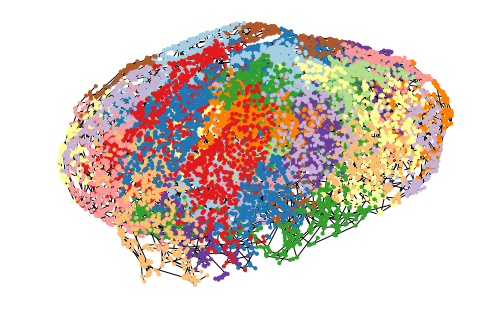

In [17]:
G_LS174T_nx = nx.read_edgelist("../data/Edgelist/LS174T_clean_EdgesList.txt", nodetype=int)
LS174T_pos = get_pos('../data/og_files/LS174T_coordinates.txt')
# print(LS174T_pos)
nx.draw(G_LS174T_nx, node_color=np.asarray(nidx2clust_LS)+1, pos = LS174T_pos, node_size=10, cmap=plt.cm.Paired)

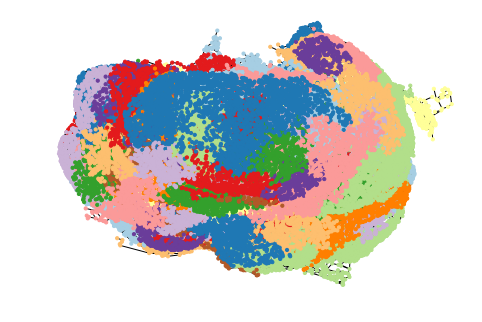

In [18]:
G_SW1222_nx = nx.read_edgelist("../data/Edgelist/SW1222_clean_EdgesList.txt", nodetype=int)
SW1222_pos = get_pos('../data/og_files/SW1222_coordinates.txt')
# print(LS174T_pos)
nx.draw(G_SW1222_nx, node_color=np.asarray(nidx2clust_SW), pos = SW1222_pos, node_size=10, cmap=plt.cm.Paired)

In [9]:
np.savetxt('LS_communities.txt', nidx2clust_LS, delimiter = ' ')
np.savetxt('SW_communities.txt', nidx2clust_SW, delimiter = ' ')

In [19]:
radii_SW = loadNodeAttr('../data/og_files/SW122_spatialGraph_RIN.txt')
radii_LS = loadNodeAttr('../data/og_files/LS174T_spatialGraph_RIN.txt')

In [21]:
community_radii_LS = defaultdict(list)
for i,node in enumerate(nidx2clust_LS):
    community_radii_LS[node].append(radii_LS[i])

In [27]:
community_radii_SW = defaultdict(list)
for i,node in enumerate(nidx2clust_SW):
    community_radii_SW[node].append(radii_SW[i])
print community_radii_SW.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]


(array([ 146.,   54.,   97.,  238.,  336.,  801.,  556.,  779., 1188.,
        1112., 1157., 2267., 1290., 1400., 1193.,  958., 1187.,  632.,
        1049.,  340.,  290.,  417.,  124.,   55.,  158.,   60.,  130.,
           7.,    4.]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
        10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5,
        16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5]),
 <a list of 29 Patch objects>)

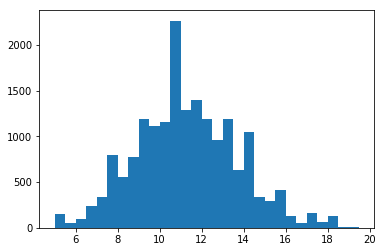

In [23]:
plt.hist(radii_LS.values(), bins = np.arange(5,20,0.5))

(array([ 4.,  0.,  3.,  4., 10., 16., 17., 18., 39., 50., 35., 87., 36.,
        40., 45., 38., 27., 14., 43.,  9., 10., 13.,  4.,  1.,  4.,  1.,
         4.,  0.,  0.]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
        10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5,
        16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5]),
 <a list of 29 Patch objects>)

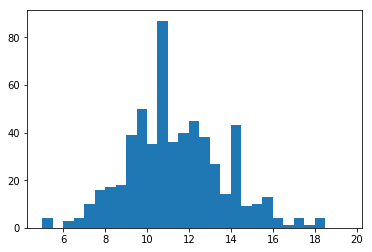

In [24]:
plt.hist(community_radii_LS[0], bins = np.arange(5,20,0.5))
# plt.gca().set_xscale('log')
# plt.gcf().set_size_inches(18.5, 10.5)

(array([ 4.,  0.,  1.,  5.,  7., 17., 17., 31., 35., 32., 40., 57., 45.,
        42., 29., 41., 20., 25., 45.,  6.,  6., 13.,  4.,  1.,  4.,  5.,
         1.,  0.,  0.]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
        10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5,
        16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5]),
 <a list of 29 Patch objects>)

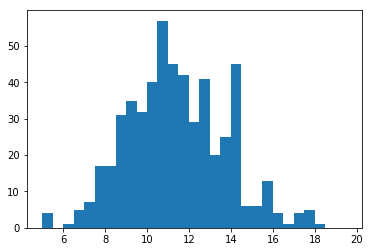

In [25]:
plt.hist(community_radii_LS[1], bins = np.arange(5,20,0.5))
# plt.gca().set_xscale('log')
# plt.gcf().set_size_inches(18.5, 10.5)

(array([ 3.,  2.,  1.,  8., 12., 19., 17., 25., 33., 30., 35., 75., 40.,
        39., 31., 26., 27.,  9., 23., 14., 10.,  5.,  2.,  4.,  6.,  1.,
         3.,  0.,  0.]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
        10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5,
        16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5]),
 <a list of 29 Patch objects>)

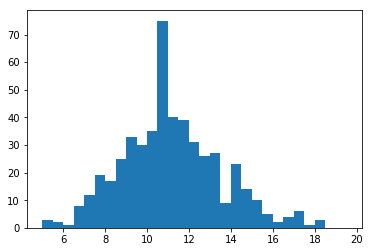

In [26]:
plt.hist(community_radii_LS[2], bins = np.arange(5,20,0.5))
# plt.gca().set_xscale('log')
# plt.gcf().set_size_inches(18.5, 10.5)